# **How to Use SAHI to Detect Small Objects**

The experiment was done by following roboflow artical here: https://blog.roboflow.com/how-to-use-sahi-to-detect-small-objects/

We used ultralytic Yolov8 for object detection.
https://pypi.org/project/ultralytics/

In [2]:
# install Roboflow Supervision and ultralytics python packages
!pip install supervision
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 6.6 MB/s eta 0:00:00


In [18]:
# import required packages
import supervision as sv
import numpy as np
import cv2
from ultralytics import YOLO
# download and load Yolov8x Model
model = YOLO("yolov8x.pt")
# define a callback function for inference
def callback(x: np.ndarray) -> sv.Detections:
    result = model(x, verbose=False, conf=0.8)[0]
    return sv.Detections.from_ultralytics(result)

In [19]:
# read image (You can upload your Image for experiment)
image = cv2.imread("/content/sami2.png")
# start slicing inference for small object detection
slicer = sv.InferenceSlicer(callback=callback)
# grab slicing detection results
sliced_detections = slicer(image=image)

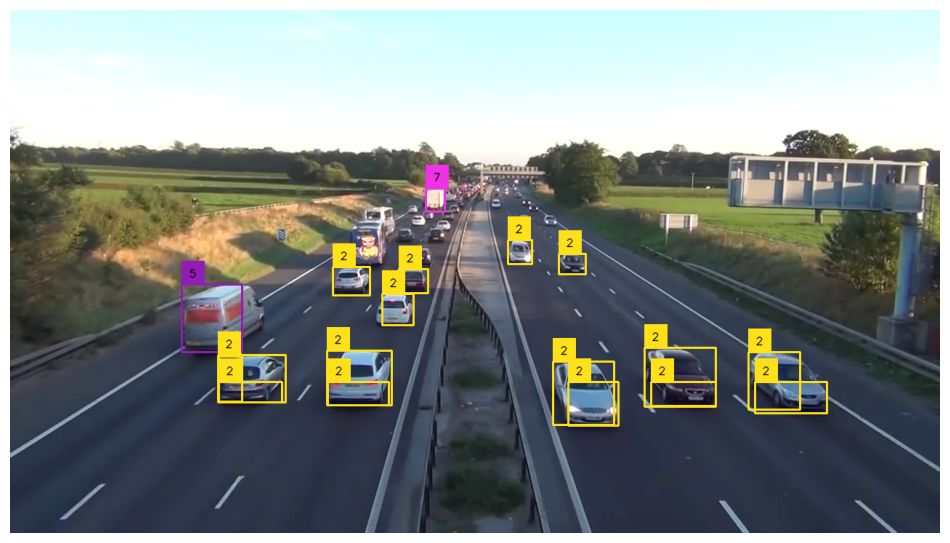

In [20]:
# initialize box annotator with roboflow supervision
box_annotator = sv.BoxAnnotator()
# draw the results on image
sliced_image = box_annotator.annotate(image.copy(), detections=sliced_detections)
# show results
sv.plot_image(sliced_image)